In [279]:
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import os
import glob
import sys
os.chdir("../data")
sys.path.append('home/sein/ksc_model/data/A-1/configs/A-1')
dir_list = glob.glob('A-1/configs/A-1/*.cnf')
df = pd.read_csv('A-1/result/external_metrics.csv')
tplt_df = df[['tps','latency_READ']]


print(tplt_df)

         tps  latency_READ
0    87624.7         305.0
1    86652.8         339.0
2    86010.4         431.0
3    79557.0         362.0
4    83238.3         398.0
..       ...           ...
995  84583.0         328.0
996  92383.8         309.0
997  88124.3         379.0
998  79968.6         363.0
999  81131.2         297.0

[1000 rows x 2 columns]


In [149]:
df[['tps','latency_READ']]

,tps,latency_READ
0,87624.7,305.0
1,86652.8,339.0
2,86010.4,431.0
3,79557.0,362.0
4,83238.3,398.0
...,...,...
995,84583.0,328.0
996,92383.8,309.0
997,88124.3,379.0
998,79968.6,363.0


Text(0, 0.5, 'latency')

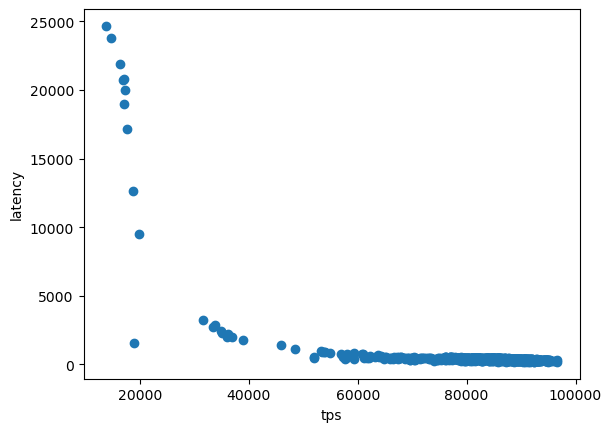

In [137]:
plt.scatter(df['tps'],df['latency_READ'])
plt.xlabel('tps')
plt.ylabel('latency')
#plt.show()

In [271]:
### DBSCAN -------------------------------------------------------------------------------
from sklearn.cluster import DBSCAN
import matplotlib.pyplot  as plt
from sklearn.preprocessing import MinMaxScaler

tplt_df = df[['tps','latency_READ']]

scaler = MinMaxScaler()
data_scale = pd.DataFrame(scaler.fit_transform(tplt_df), columns = tplt_df.columns)

model=DBSCAN(eps =0.5, min_samples=10)

model.fit(data_scale)
data_scale['cluster'] = model.fit_predict(data_scale)

print(data_scale)


          tps  latency_READ  cluster
0    0.891390      0.005388        0
1    0.879652      0.006776        0
2    0.871894      0.010531        0
3    0.793953      0.007715        0
4    0.838414      0.009184        0
..        ...           ...      ...
995  0.854654      0.006327        0
996  0.948869      0.005551        0
997  0.897424      0.008409        0
998  0.798924      0.007756        0
999  0.812965      0.005062        0

[1000 rows x 3 columns]


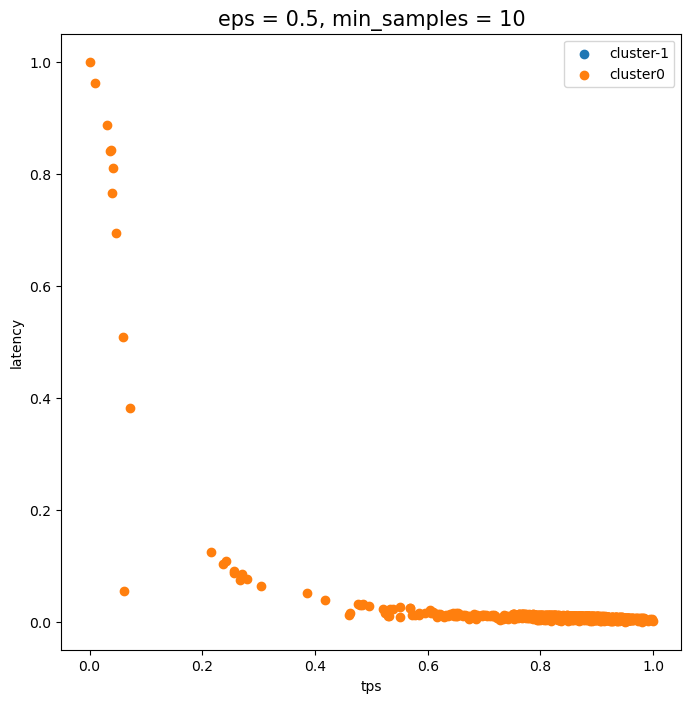

In [272]:
### DBSCAN -------------------------------------------------------------------------------
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

# 이상치 번호는 -1, 클러스터 최대 숫자까지 iteration
# for i in range(-1, predict.max() + 1):
#     plt.scatter(predict.loc[predict == i, 'tps'], predict.loc[predict == i, 'Spending Score (1-100)'], 
#                     label = 'cluster ' + str(i))
for i in range(-1, data_scale['cluster'].max() + 1):
    plt.scatter(data_scale.loc[data_scale['cluster'] == i, 'tps'], data_scale.loc[data_scale['cluster']==i,'latency_READ'], 
                label = 'cluster' + str(i))
plt.legend()
plt.title('eps = 0.5, min_samples = 10', size = 15)
plt.xlabel('tps')
plt.ylabel('latency')
plt.show()

In [156]:
###실루엣 -------------------------------------
from sklearn.preprocessing import MinMaxScaler

tplt_df = df[['tps','latency_READ']]
#데이터 전처리 MINMAX
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(tplt_df)

#데이터 전처리 
# scaler = StandardScaler()
# data_scale = scaler.fit_transform(tplt_df)




k = 4

kmeans= KMeans(n_clusters=k, random_state=10).fit(data_scale)
# model.fit(data_scale)
tplt_df['cluster'] = kmeans.labels_
# tplt_df.loc[4]
tplt_df.to_csv("clustering2.csv")

score_samples = silhouette_samples(data_scale, tplt_df['cluster'])
print('silhouette_samples() return 값의 shape', score_samples.shape)

tplt_df['silhouette_coeff'] = score_samples

average_score = silhouette_score(data_scale, tplt_df['cluster'])
print('silhouette analysis score:'.format(average_score))

tplt_df.head(5)

tplt_df.groupby('cluster')['silhouette_coeff'].mean()

silhouette_samples() return 값의 shape (1000,)
silhouette analysis score:


/tmp/ipykernel_12315/1602548919.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tplt_df['cluster'] = kmeans.labels_
/tmp/ipykernel_12315/1602548919.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tplt_df['silhouette_coeff'] = score_samples


cluster
0    0.526839
1    0.597209
2    0.713581
3    0.433084
Name: silhouette_coeff, dtype: float64

In [157]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 

#     from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, random_state=10)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

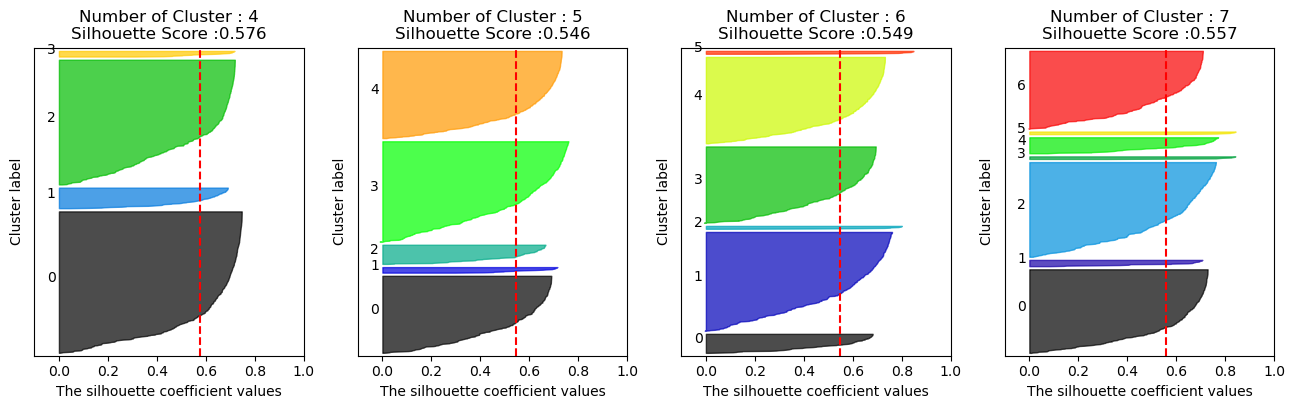

In [162]:
###cluster 개수 확인 - 실루엣 계수
import numpy as np
# make_blobs 을 통해 clustering 을 위한 4개의 클러스터 중심의 500개 2차원 데이터 셋 생성  
from sklearn.datasets import make_blobs

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette([ 4,5,6,7], tplt_df)

/tmp/ipykernel_12315/711006137.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tplt_df['cluster'] = model.fit_predict(data_scale)


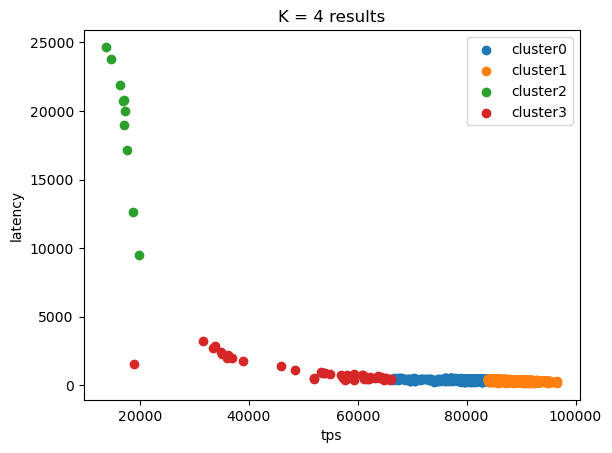

In [280]:
#수정---------------------------------------------------------
from sklearn.preprocessing import MinMaxScaler


#데이터 전처리 MINMAX
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(tplt_df)

#데이터 전처리 
# scaler = StandardScaler()
# data_scale = scaler.fit_transform(tplt_df)

k = 4

model = KMeans(n_clusters = k, random_state = 10)
model.fit(data_scale)
tplt_df['cluster'] = model.fit_predict(data_scale)
# df['cluster'] = model.fit_predict(data_scale)
# tplt_df.to_csv("clustering2.csv")
# df['cluster'] = model.fit_predict(data_scale)
# df.to_csv("clustering.csv")

for i in range(k):
    plt.scatter(tplt_df.loc[tplt_df['cluster'] == i, 'tps'], tplt_df.loc[tplt_df['cluster']==i,'latency_READ'], 
                label = 'cluster' + str(i))

plt.legend()
plt.title('K = %d results'%k)
plt.xlabel('tps')
plt.ylabel('latency')
plt.show()

In [281]:
data_scale

array([[0.89139041, 0.00538819],
       [0.87965226, 0.00677606],
       [0.87189366, 0.01053147],
       ...,
       [0.89742435, 0.00840885],
       [0.79892365, 0.00775574],
       [0.81296498, 0.00506164]])

In [282]:
tplt_df['cluster'] = model.fit_predict(data_scale)
tplt_df.to_csv("clustering2.csv")

print(tplt_df)

         tps  latency_READ  cluster
0    87624.7         305.0        1
1    86652.8         339.0        1
2    86010.4         431.0        1
3    79557.0         362.0        0
4    83238.3         398.0        0
..       ...           ...      ...
995  84583.0         328.0        1
996  92383.8         309.0        1
997  88124.3         379.0        1
998  79968.6         363.0        0
999  81131.2         297.0        0

[1000 rows x 3 columns]


/tmp/ipykernel_12315/67273392.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tplt_df['cluster'] = model.fit_predict(data_scale)


In [187]:
tplt_df['cluster'] = model.fit_predict(data_scale)
tplt_df.to_csv("clustering2.csv")

/tmp/ipykernel_12315/3675150967.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tplt_df['cluster'] = model.fit_predict(data_scale)


In [188]:
clus=pd.read_csv("clustering2.csv")
one_hot = pd.get_dummies(clus, columns=['cluster'])
print(one_hot)

     Unnamed: 0      tps  latency_READ  cluster_0  cluster_1  cluster_2  \
0             0  87624.7         305.0          1          0          0   
1             1  86652.8         339.0          1          0          0   
2             2  86010.4         431.0          1          0          0   
3             3  79557.0         362.0          0          1          0   
4             4  83238.3         398.0          0          1          0   
..          ...      ...           ...        ...        ...        ...   
995         995  84583.0         328.0          1          0          0   
996         996  92383.8         309.0          1          0          0   
997         997  88124.3         379.0          1          0          0   
998         998  79968.6         363.0          0          1          0   
999         999  81131.2         297.0          0          1          0   

     cluster_3  
0            0  
1            0  
2            0  
3            0  
4            0

In [41]:
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans


import os
import glob
import sys

wk = 'B-1'

os.chdir("../data")
sys.path.append(f'home/sein/ksc_model/data/{wk}/b/configs')
dir_list = glob.glob(f'{wk}/b/configs/*.cnf')
df = pd.read_csv(f'{wk}/b/results/{wk}/external_metrics.csv')
tplt_df = df[['tps','latency_READ']]


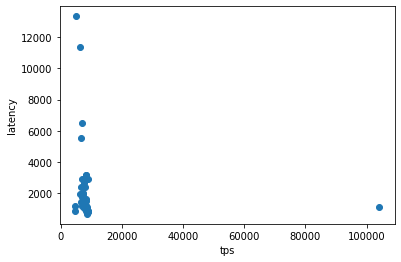

In [9]:
plt.scatter(df['tps'], df['latency_READ'])
plt.xlabel('tps')
plt.ylabel('latency')
#plt.show()

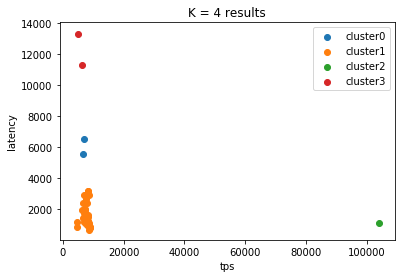

In [42]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scale = scaler.fit_transform(tplt_df)

k = 4

model = KMeans(n_clusters = k, random_state = 10)
model.fit(data_scale)
df['cluster'] = model.fit_predict(data_scale)

for i in range(k):
    plt.scatter(df.loc[df['cluster'] == i, 'tps'], df.loc[df['cluster']==i,'latency_READ'], 
                label = 'cluster' + str(i))

plt.legend()
plt.title('K = %d results'%k)
plt.xlabel('tps')
plt.ylabel('latency')
plt.show()

In [44]:
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans


import os
import glob
import sys

wk = 'C-1'

os.chdir("../data")
sys.path.append(f'home/sein/ksc_model/data/{wk}/c/configs')
dir_list = glob.glob(f'{wk}/c/configs/*.cnf')
df = pd.read_csv(f'{wk}/c/results/{wk}/external_metrics.csv')
tplt_df = df[['tps','latency_READ']]

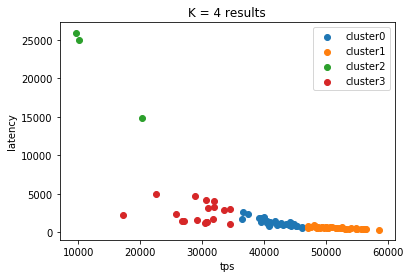

In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scale = scaler.fit_transform(tplt_df)

k = 4

model = KMeans(n_clusters = k, random_state = 10)
model.fit(data_scale)
df['cluster'] = model.fit_predict(data_scale)

for i in range(k):
    plt.scatter(df.loc[df['cluster'] == i, 'tps'], df.loc[df['cluster']==i,'latency_READ'], 
                label = 'cluster' + str(i))

plt.legend()
plt.title('K = %d results'%k)
plt.xlabel('tps')
plt.ylabel('latency')
plt.show()

In [ ]:
df['cluster'] = model.fit_predict(data_scale)
df.to_csv("clustering2.csv")

tplt_df['cluster'] = model.fit_predict(data_scale)
df.to_csv("clustering2.csv")

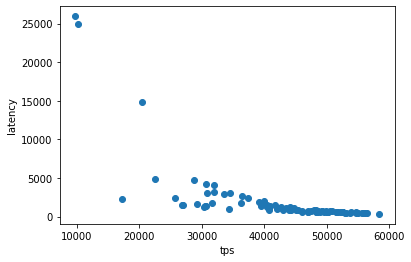

In [45]:
plt.scatter(df['tps'], df['latency_READ'])
plt.xlabel('tps')
plt.ylabel('latency')
plt.show()

In [9]:
# from glob import glob
import numpy as np
# import matplotlib.pyplot as plt
import pandas as pd
# from sklearn.cluster import KMeans
import configparser
import os
import glob
# import sys
# #config 파일 가져오기 
os.chdir("../data")

properties = configparser.ConfigParser()
# sys.path.append('home/sein/ksc_model/data/A-1/configs/A-1')
dir_list = glob.glob('A-1/configs/A-1/*.cnf')
#mysqld = properties["mysqld"]
k = 0
# print(properties['mysqld'])
# print(properties['mysqld']['log-error'])
fin_list = []
for k in dir_list:
    properties.read(k)
    # print('---------------------------------------------------------------------')
    # print(k)
    # config_dict = {}
    conf_list = []
    for index, i in enumerate(properties['mysqld']):
        if (index != 0)& (index != 1):
            conf_list.append(properties['mysqld'][i]) 
        # print("key: ", i)
        # print("values: ", properties['mysqld'][i])
    # print(conf_list)
    fin_list.append(conf_list)
# print(np.array(fin_list).shape) 
rfin_array = np.array(fin_list)
print(pd.DataFrame(rfin_array))



             0           1  2   3   4    5  6   7    8   9   10    11    12  \
0    1042796691  2883419557  1  45  53  765  0  22  598  75  38   101  5382   
1     905101515  5239633151  1   7  16  975  1   6  173  82  69   338  1713   
2     664998833  2974372716  0  33  43  810  1  49  974  73  77   808   661   
3     770902017  8393825869  1  37  59  246  0  19  601  97  34  1022  6719   
4     235421136  6822829718  1  32  47  805  1  29  885   5  18   481  3448   
..          ...         ... ..  ..  ..  ... ..  ..  ...  ..  ..   ...   ...   
995     5620114  7363467346  0  47  37  122  0  24  890  42  90   968  7952   
996  1054678359  4592754986  0  27  40  134  1  56  726  67  91   758  1645   
997    16133228  4480649574  1   7   8   18  1  16  374  71  44   201  5310   
998   380390570  3150986690  0  57  20  675  1  40  529  42  57   971   305   
999   348998016  3447046224  1  46  14  358  1  23  491  16  90   544  8364   

     13  14  15  16       17     18 19  
0    31  5

In [10]:
import torch
rfin_array = np.array(fin_list).astype(float)
input_data = torch.tensor(rfin_array)

tensor([[1.0428e+09, 2.8834e+09, 1.0000e+00,  ..., 1.6142e+06, 7.1440e+03,
         1.0000e+00],
        [9.0510e+08, 5.2396e+09, 1.0000e+00,  ..., 1.3163e+06, 1.0230e+04,
         1.0000e+00],
        [6.6500e+08, 2.9744e+09, 0.0000e+00,  ..., 4.2980e+05, 3.0670e+03,
         0.0000e+00],
        ...,
        [1.6133e+07, 4.4806e+09, 1.0000e+00,  ..., 4.8342e+05, 3.4520e+03,
         2.0000e+00],
        [3.8039e+08, 3.1510e+09, 0.0000e+00,  ..., 2.6907e+05, 2.4210e+03,
         0.0000e+00],
        [3.4900e+08, 3.4470e+09, 1.0000e+00,  ..., 1.6096e+06, 9.5670e+03,
         1.0000e+00]], dtype=torch.float64)

In [38]:
# from glob import glob
import numpy as np
# import matplotlib.pyplot as plt
import pandas as pd
# from sklearn.cluster import KMeans
import configparser
import os
import glob
import torch
# import sys
# #config 파일 가져오기 
# os.chdir("../data")

dir = '../data/A-1/configs/A-1/*.cnf'
def make_data(directory):
    properties = configparser.ConfigParser()
    # sys.path.append('home/sein/ksc_model/data/A-1/configs/A-1')
    dir_list = sorted(glob.glob(directory))
    #dir_list = glob.glob(directory)

    #mysqld = properties["mysqld"]
    k = 0
    # print(properties['mysqld'])
    # print(properties['mysqld']['log-error'])
    fin_list = []
    for k in dir_list:
        properties.read(k)
        # print('---------------------------------------------------------------------')
        # print(k)
        # config_dict = {}
        conf_list = []
        for index, i in enumerate(properties['mysqld']):
            if (index != 0)& (index != 1):
                conf_list.append(properties['mysqld'][i]) 
            # print("key: ", i)
            # print("values: ", properties['mysqld'][i])
        # print(conf_list)
        fin_list.append(conf_list)
    # print(np.array(fin_list).shape) 
    rfin_array = np.array(fin_list)
    # print(pd.DataFrame(rfin_array))


    rfin_array = np.array(fin_list).astype(float)
    input_data = torch.tensor(rfin_array)
    

    return input_data

In [81]:
import pandas as pd
import numpy as np
import glob
import torch
from MLP import NeuralModel
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from cluster import make_data
from sklearn.metrics import log_loss
from xgboost import XGBClassifier


def train_Net(logger, data, METRIC, MODE, batch_size, lr, epochs, hidden_dim):
# # def train_Net(logger, data, METRIC, MODE, batch_size, lr, epochs, hidden_dim, group_dim, Q_NUM, dot, EX_NUM=4, lamb=0.1):

    df_pred = pd.DataFrame(columns=("METRIC", "r2",  "MSE"))

    k_r2 = 0
    # k_MSE = 0
    cnt = 0


model = XGBClassifier(n_estimators=500, learning_rate=0.2, max_depth=4, random_state =32)

        # dir_list = glob.glob('../data/A-1/configs/A-1/*.cnf')

clus=pd.read_csv("../data/clustering2.csv")


rfin_array = np.array(fin_list).astype(float)
input_data = torch.tensor(rfin_array)

one_hot = pd.get_dummies(clus, columns=['cluster'])

input_data = data

X = input_data #config 파일
#         print(X)
        # quit()

Y = one_hot #one-hot vector 값

Y = Y.iloc[:,3:]

#         print(Y)


X_tr, X_te, y_tr, y_te = train_test_split(X, Y, test_size=0.2, shuffle=False) #train set, test set 나누기

        #X_tr, X_te, y_tr, y_te = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=1004) #train set, test set 나누기

        # TODO: scale
        # print(X_tr)
        # quit()
scaler_X = MinMaxScaler().fit(X_tr)
        # scaler_y = StandardScaler().fit(y_tr) #scale 값

        #적용
norm_X_tr = torch.Tensor(scaler_X.transform(X_tr)).cuda()
norm_X_te = torch.Tensor(scaler_X.transform(X_te)).cuda()
        # print(y_tr.shape)
        # quit()
y_tr = y_tr.to_numpy()
y_te = y_te.to_numpy()
y_tr = torch.Tensor(y_tr).cuda()
y_te = torch.Tensor(y_te).cuda()

model.fit(X_tr, y_tr)

NameError: name 'fin_list' is not defined

In [274]:
###clustering 이후 원핫벡터

import pandas as pd
import numpy as np
import glob
import torch
from MLP import NeuralModel
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from cluster import make_data
from sklearn.metrics import log_loss
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# def train_Net(logger, data, METRIC, MODE, batch_size, lr, epochs, hidden_dim):
# # # def train_Net(logger, data, METRIC, MODE, batch_size, lr, epochs, hidden_dim, group_dim, Q_NUM, dot, EX_NUM=4, lamb=0.1):

#     df_pred = pd.DataFrame(columns=("METRIC", "r2",  "MSE"))

#     k_r2 = 0
#     # k_MSE = 0
#     cnt = 0


    

    # dir_list = glob.glob('../data/A-1/configs/A-1/*.cnf')
input_data = make_data('../data/A-1/configs/A-1/*.cnf')    
clus=pd.read_csv("../data/clustering2.csv")
# rfin_array = np.array(fin_list).astype(float)
# input_data = torch.tensor(rfin_array)

one_hot = pd.get_dummies(clus, columns=['cluster'])

#input_data = data

X = input_data #config 파일
# print(X)
# quit()

Y = one_hot #one-hot vector 값

    
Y = Y.iloc[:,3:]
Y.columns = ["cluster_0", "cluster_1", "cluster_2","cluster_3"]


In [291]:
Y[['cluster_0','cluster_1']]


,cluster_0,cluster_1
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1
...,...,...
995,1,0
996,1,0
997,1,0
998,0,1


In [289]:
Y.loc[0]

cluster_0     1
cluster_1     0
cluster_2     0
cluster_3     0
classifier    0
Name: 0, dtype: int64

In [285]:
Y

,cluster_0,cluster_1,cluster_2,cluster_3,classifier
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,1,0,0,1
4,0,1,0,0,1
...,...,...,...,...,...
995,1,0,0,0,0
996,1,0,0,0,0
997,1,0,0,0,0
998,0,1,0,0,1


In [276]:
print(Y)

     cluster_0  cluster_1  cluster_2  cluster_3
0            1          0          0          0
1            1          0          0          0
2            1          0          0          0
3            0          1          0          0
4            0          1          0          0
..         ...        ...        ...        ...
995          1          0          0          0
996          1          0          0          0
997          1          0          0          0
998          0          1          0          0
999          0          1          0          0

[1000 rows x 4 columns]


In [277]:
print(Y.sum())

cluster_0    591
cluster_1    354
cluster_2     45
cluster_3     10
dtype: int64


In [278]:
###XGBoost 적용

import pandas as pd
import numpy as np
import glob
import torch
from MLP import NeuralModel
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from cluster import make_data
from sklearn.metrics import log_loss
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# def train_Net(logger, data, METRIC, MODE, batch_size, lr, epochs, hidden_dim):
# # # def train_Net(logger, data, METRIC, MODE, batch_size, lr, epochs, hidden_dim, group_dim, Q_NUM, dot, EX_NUM=4, lamb=0.1):

#     df_pred = pd.DataFrame(columns=("METRIC", "r2",  "MSE"))

#     k_r2 = 0
#     # k_MSE = 0
#     cnt = 0


    

    # dir_list = glob.glob('../data/A-1/configs/A-1/*.cnf')
input_data = make_data('../data/A-1/configs/A-1/*.cnf')    
clus=pd.read_csv("../data/clustering2.csv")
# rfin_array = np.array(fin_list).astype(float)
# input_data = torch.tensor(rfin_array)

one_hot = pd.get_dummies(clus, columns=['cluster'])

#input_data = data

X = input_data #config 파일
# print(X)
# quit()

Y = one_hot #one-hot vector 값       
    
Y = Y.iloc[:,3:]
i = 0

Z = []
for i in range (1000):
     Z.append((np.argmax(Y.loc[i])))

Z_df = pd.DataFrame(Z)
# print(Z_df)

Y['classifier'] = Z_df



X_tr, X_te, y_tr, y_te = train_test_split(X, Z_df, test_size=0.2, shuffle=False) #train set, test set 나누기

#X_tr, X_te, y_tr, y_te = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=1004) #train set, test set 나누기

# TODO: scale
# print(X_tr)
# quit()
scaler_X = MinMaxScaler().fit(X_tr)
# scaler_y = StandardScaler().fit(y_tr) #scale 값

#적용
norm_X_tr = torch.Tensor(scaler_X.transform(X_tr)).cuda()
#print(norm_X_tr.shape)
norm_X_te = torch.Tensor(scaler_X.transform(X_te)).cuda()
# print(y_tr.shape)
# quit()
y_tr = y_tr.to_numpy()
y_te = y_te.to_numpy()
y_tr = torch.Tensor(y_tr).cuda()
#y_te = torch.Tensor(y_te).cuda()

model = XGBClassifier(n_estimators=700, learning_rate=0.01, max_depth=4)
 
model.fit(norm_X_tr.cpu().detach().numpy(), y_tr.cpu().detach().numpy())


y_pred = model.predict(norm_X_te.cpu().detach().numpy())
accuracy_score(y_pred, y_te)


0.545

In [6]:
Y

,cluster_0,cluster_1,cluster_2,cluster_3,classifier
0,0,0,0,1,3
1,0,0,0,1,3
2,0,0,0,1,3
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
995,1,0,0,0,0
996,0,0,0,1,3
997,0,0,0,1,3
998,1,0,0,0,0


In [91]:
print(np.argmax(Y.loc[0]))
print(np.argmax(Y.loc[5]))

0
2


In [52]:
y_pred[:10,:], y_te[:10,:]

(array([[0., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 0., 1., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.]]),
 array([[1, 0, 0, 0],
        [1, 0, 0, 0],
        [0, 0, 1, 0],
        [0, 1, 0, 0],
        [1, 0, 0, 0],
        [0, 0, 1, 0],
        [1, 0, 0, 0],
        [1, 0, 0, 0],
        [1, 0, 0, 0],
        [0, 0, 1, 0]], dtype=uint8))

In [60]:
np.argmax( [0,1,0,0] )

1

In [61]:
np.argmax(Y)

0

In [63]:
Y = Y.iloc[:,3:]
Y['classification'] = target

In [68]:
###Triplet Loss 적용

import pandas as pd
import numpy as np
import glob
import torch
from MLP import NeuralModel
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from cluster import make_data
from sklearn.metrics import log_loss
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# def train_Net(logger, data, METRIC, MODE, batch_size, lr, epochs, hidden_dim):
# # # def train_Net(logger, data, METRIC, MODE, batch_size, lr, epochs, hidden_dim, group_dim, Q_NUM, dot, EX_NUM=4, lamb=0.1):

#     df_pred = pd.DataFrame(columns=("METRIC", "r2",  "MSE"))

#     k_r2 = 0
#     # k_MSE = 0
#     cnt = 0


    

    # dir_list = glob.glob('../data/A-1/configs/A-1/*.cnf')
input_data = make_data('../data/A-1/configs/A-1/*.cnf')    
clus=pd.read_csv("../data/clustering2.csv")
# rfin_array = np.array(fin_list).astype(float)
# input_data = torch.tensor(rfin_array)

one_hot = pd.get_dummies(clus, columns=['cluster'])

#input_data = data

X = input_data #config 파일
# print(X)
# quit()

Y = one_hot #one-hot vector 값       
    
Y = Y.iloc[:,3:]

Y_list = Y.values.tolist()
Y_res = []
for value in Y_list:
    if value not in Y_res:
        Y_res.append(value)
# Y_list = []
# for i in range (1000):
#     Y_list.append(Y.loc[i])


In [69]:
print(Y_res)

[[0, 0, 0, 1], [1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0]]


In [65]:
print(Y_list)

[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 0, 1], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [0, 0, 0, 1], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [0, 0, 0, 1], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 0, 1], [1, 0, 0, 0], [1, 0, 0, 0], [0, 0, 0, 1], [1, 0, 0, 0], [1, 0, 0, 0], [0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 0, 1], [1, 0, 0, 0], [0, 1, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [0, 0, 0, 1], [1, 0, 0, 0], [0, 0, 0, 1], [0, 0, 0, 1], [1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0], [1, 0, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0, 0, 0, 1], [0, 1, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 0, 1], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [0, 0, 0, 1], [1, 0, 0, 0], [0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 0, 1], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 0, 1], [1, 0, 0, 0], [0, 0, 0, 1], [1, 0, 0, 0], [1, 0, 0, 0], [0, 0, 0, 1], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0

In [32]:
print(Y)

     cluster_0  cluster_1  cluster_2  cluster_3
0            0          0          0          1
1            0          0          0          1
2            0          0          0          1
3            1          0          0          0
4            1          0          0          0
..         ...        ...        ...        ...
995          1          0          0          0
996          0          0          0          1
997          0          0          0          1
998          1          0          0          0
999          1          0          0          0

[1000 rows x 4 columns]


In [55]:
from torch.utils.data import DataLoader

class get_data():
    def __init__ (self, X, Ypred, Yp, Yn, All_y):
        self.X = X
        self.Ypred = y_pred
        self.Yp = y_pred.copy()
        self.Yn = All_y.pop(Y_list.index(y_pred))
        
    def __getitem__(self, index):
        return self.X[index], self.Yp[index], self.Yn[index]
       

In [58]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
#from datetime import datetime
import numpy as np
from sklearn.metrics import r2_score
from network import SingleNet
from utils import get_filename
# from xgboost import XGBClassifier


# class NeuralModel():
#     def __init__(self, logger, n_estimators, lr, max_depth, random_state):
#         self.n_estimators = n_estimators
#         self.lr = lr
#         self.max_depth = max_depth                    # learning rate
#         self.random_state = random_state

#         #add logger
#         self.logger = logger
#         if self.mode == 'single':
#             self.model = SingleNet(n_estimators=opt.n_estimators, lr=opt.lr, max_depth=opt.max_depth, 
#                                     random_state=opt.random_state).cuda()         
        # if self.mode == 'single':
        #     self.model = SingleNet(input_dim=input_dim, hidden_dim=hidden_dim, 
        #                            output_dim=output_dim).cuda()  


class NeuralModel():
    def __init__(self, logger, mode, batch_size, lr, epochs, input_dim, hidden_dim, 
                 output_dim):
        self.mode = mode
        self.batch_size = batch_size
        self.lr = lr                    # learning rate
        self.epochs = epochs

        #add logger
        self.logger = logger
                
        if self.mode == 'single':
            self.model = SingleNet(input_dim=input_dim, hidden_dim=hidden_dim, 
                                   output_dim=output_dim).cuda()  
        

    #fit 
    def forward(self, X, y):
        self.fit(X, y)

    def fit(self, X, y):
        self.X_tr, self.X_te = X
        self.y_tr, self.y_te = y

        #dataset 만들기
        dataset_tr = get_data(self.X_tr, self.y_tr)
        dataset_te = get_data(self.X_te, self.y_te)
        #iteration용 데이터셋 만들기, dataloader 찾아보기
        dataloader_tr = DataLoader(dataset_tr, batch_size=self.batch_size, shuffle=True)
        dataloader_te = DataLoader(dataset_te, batch_size=self.batch_size, shuffle=True)        
        best_loss = np.inf #loss 무한대로 선언. 줄여가려고
        self.logger.info(f"[Train MODE] Training Model") 
        name = get_filename('model_save', 'model', '.pt')


        for epoch in range(self.epochs): #여러개의 iteration이 끝나면 epoch 1번 완료
            loss_tr,_ = self.train(self.model, dataloader_tr)
            if epoch % 10 == 0: 
                loss_te, te_outputs = self.valid(self.model, dataloader_te) #validation loss랑 train 했을 때 loss 볼 수 있게

            
            if best_loss > loss_te:
                best_loss = loss_te
                self.best_model = self.model
                self.best_outputs = te_outputs
                self.best_epoch = epoch
                torch.save(self.best_model, os.path.join('model_save', name))   # save best model의 parameter 파일로 저장
        self.logger.info(f"best loss is {best_loss:.4f} in [{self.best_epoch}/{self.epochs}]epoch, save model to {os.path.join('model_save', name)}")                
        print(f"best loss is {best_loss:.4f} in [{self.best_epoch}/{self.epochs}]epoch")

        return self.best_outputs

    def predict(self, X):
        return self.model(X)

    def train(self, model, train_loader):   #train_loader = 데이터셋 가져옴     
        optimizer = optim.Adam(model.parameters(), lr=self.lr)
        model.train()

        total_loss = 0.
        
        outputs = torch.Tensor().cuda()

        
        for data, Yp, Yn in train_loader:   #데이터 x 타겟 y
            optimizer.zero_grad() #그라디언트 0으로 초기화
        
        
            output = model(data)
            criterion = nn.TripletMarginLoss(margin=1.0, p=2)
            loss = criterion(output, Yp, Yn)
#             criterion = nn.CrossEntropyLoss()
#             loss = criterion(output, target)
            
            ## backpropagation
            loss.backward()
            optimizer.step()
            ## Logging
            total_loss += loss.item()
            outputs = torch.cat((outputs, output)) #outputs랑 output 합치기
        total_loss /= len(train_loader) #loss 평균값구하기///len(train_loader) 가 iteration 갯수, 

        return total_loss,  outputs 

    def valid(self, model, valid_loader): #한 epoch가 끝날 때마다 train이 제대로 되었는지 확인하기 위해서
        model.eval()

        ## Valid start    
        total_loss = 0.
        
        outputs = torch.Tensor().cuda()
        # r2_res = 0
        with torch.no_grad():
            for data, target in valid_loader:
             
                output = model(data)
                criterion = nn.TripletMarginLoss(margin=1.0, p=2)
                loss = criterion(output, Yp, Yn)
#                 criterion = nn.CrossEntropyLoss()
#                 loss = criterion(output, target)

                true = target.cpu().detach().numpy().squeeze()
                pred = output.cpu().detach().numpy().squeeze()            
                # Accuracy_2 += accuracy(true,pred)
                # r2_res += r2_score(true, pred) #실제값과 예측값에 대한 r2 계산
                total_loss += loss.item()
                outputs = torch.cat((outputs, output))
        total_loss /= len(valid_loader) #len(-) = iteration 횟수
        #total_dot_loss /= len(valid_loader)
        # Accuracy_2 /= len(valid_loader)
        # r2_res /= len(valid_loader)
        print(total_loss)
        # print(Accuracy_2)
        return total_loss, outputs
    


NameError: name 'total_loss' is not defined

In [57]:
total_loss

NameError: name 'total_loss' is not defined

In [54]:
def main():

   
    # input_data = make_data('A-1/configs/A-1/*.cnf')
    input_data = make_data('../data/A-1/configs/A-1/*.cnf')
    # print(input_data)
    # assert False
    # clus=pd.read_csv("../data/clustering2.csv")
    # one_hot = pd.get_dummies(clus, columns=['cluster'])
    if opt.train:
        # accuracy, true, pred, df_pred = train_Net(logger, data=input_data, METRIC=opt.external, MODE=opt.mode, 
        #                                                batch_size=opt.batch_size, lr=opt.lr, epochs=opt.epochs, 
        #                                                 hidden_dim=opt.hidden_size) 

        # true, pred, df_pred = train_Net(logger, data=input_data, METRIC=opt.external, 
        #                                                 n_estimators=opt.n_estimators, lr=opt.lr, max_depth=opt.max_depth, 
        #                                                  random_state=opt.random_state) 

        true, pred, df_pred = train_Net(data=input_data, METRIC=opt.external, MODE=opt.mode, 
                                                        batch_size=opt.batch_size, lr=opt.lr, epochs=opt.epochs, 
                                                         hidden_dim=opt.hidden_size) 
        logger.info(f'\npred = \n{pred[:]}')
        #, {np.exp(pred[:5])}
        logger.info(f'\ntrue = \n{true[:]}')
        #{np.exp(true[:5])}
        #logger.info(f'\naccuracy(mean_squared_error) = {mean_squared_error(true, pred)}\naccuracy(mean_absolute_error) = {mean_absolute_error(true, pred)}')
        logger.info(f'\nMetric : {opt.external}')
        # logger.info(f'  (r2 score) = {r2:.4f}')
        # logger.info(f'  (MSE score) = {MSE:.4f}')

            
    elif opt.eval:
        logger.info('## EVAL MODE ##')


# if __name__ == '__main__':
#     try:
#         main(
#         print("F")
#     except:
#         logger.exception("ERROR!!")
#     finally:
#         logger.handlers.clear()

In [78]:
triplet_loss = nn.TripletMarginLoss(margin=1.0, p=2)
anchor = torch.randn(100, 128, requires_grad=True)
positive = torch.randn(100, 128, requires_grad=True)
negative = torch.randn(100, 128, requires_grad=True)
output = triplet_loss(anchor, positive, negative)

In [75]:
anchor
"---------------------------"
positive
"---------------------------"
negative

tensor([[ 2.0848,  0.3601,  0.2467,  ..., -0.3569, -1.2839,  0.6674],
        [-0.3679, -0.3598,  1.2501,  ..., -0.6086, -0.3148, -0.8492],
        [-1.2329,  0.3450, -0.6445,  ..., -0.0558,  1.3920,  0.3900],
        ...,
        [-0.3393, -0.7883, -0.9049,  ...,  0.1011, -0.1585, -2.6008],
        [ 0.3839, -0.2412, -1.0166,  ...,  0.5469, -0.4766, -0.4923],
        [ 0.8488, -1.4226,  0.0170,  ...,  0.7373,  0.3377, -1.1400]],
       requires_grad=True)

In [79]:
output

tensor(1.1177, grad_fn=<MeanBackward0>)